# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [25]:
df = pd.read_csv('Dataset_inisiasi.csv')

# One-Hot Encoding pada kolom kategorikal
df_encoded = pd.get_dummies(df, columns=['provinsi', 'jenis', 'daerah', 'periode', 'tahun_kategori'])

X = df_encoded.drop(columns=['cluster'])
y = df_encoded['cluster']

# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [26]:
# Data Splitting (80% training, 20% testing)
# 80% untuk pelatihan dan 20% untuk pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Jumlah data latih: {X_train.shape[0]}")
print(f"Jumlah data uji: {X_test.shape[0]}")

Jumlah data latih: 4360
Jumlah data uji: 1091


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [ ]:
# Membuat dan Melatih Model
model = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42)

model.fit(X_train, y_train) 

RandomForestClassifier(random_state=42)

Tulis narasi atau penjelasan algoritma yang Anda gunakan.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.


Evaluasi Model Klasifikasi (Sebelum Tuning):
Accuracy: 0.9963336388634281
F1 Score: 0.9963335750411323

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       375
           1       0.99      0.99      0.99       333
           2       0.99      1.00      1.00       383

    accuracy                           1.00      1091
   macro avg       1.00      1.00      1.00      1091
weighted avg       1.00      1.00      1.00      1091



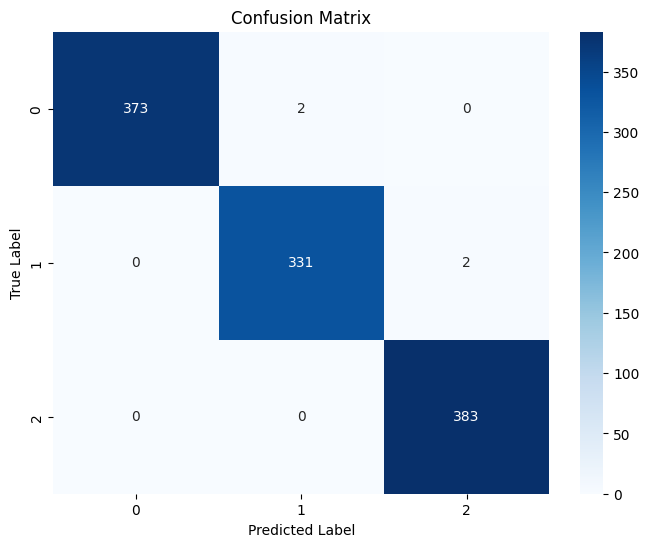

In [ ]:
# Prediksi hasil model terhadap data uji
y_pred = model.predict(X_test)

# Menghitung akurasi model berdasarkan hasil prediksi
accuracy = accuracy_score(y_test, y_pred)

# Menghitung skor F1 dengan metode pembobotan 'weighted'
f1 = f1_score(y_test, y_pred, average='weighted')

print("\nEvaluasi Model Klasifikasi (Sebelum Tuning):")
print("Accuracy:", accuracy)  
print("F1 Score:", f1)  
print("\nClassification Report:\n", classification_report(y_test, y_pred)) 

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues'  )
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Tulis hasil evaluasi algoritma yang digunakan, jika Anda menggunakan 2 algoritma, maka bandingkan hasilnya.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [ ]:
# Mendefinisikan parameter grid untuk hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 4, 6]
}

# Inisialisasi GridSearchCV untuk pencarian hyperparameter terbaik
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid, cv=5, scoring='accuracy',
    n_jobs=-1
)

# Melatih model menggunakan dataset pelatihan dengan GridSearchCV
grid_search.fit(X_train, y_train)

print("\nBest Hyperparameters:", grid_search.best_params_)

# Mengambil model terbaik berdasarkan hyperparameter yang dioptimalkan
best_model = grid_search.best_estimator_


Best Hyperparameters: {'max_depth': None, 'min_samples_split': 6, 'n_estimators': 100}


## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.


Evaluasi Model Klasifikasi (Setelah Tuning):
Accuracy: 0.997250229147571
F1 Score: 0.9972499367285304

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       375
           1       1.00      0.99      1.00       333
           2       0.99      1.00      1.00       383

    accuracy                           1.00      1091
   macro avg       1.00      1.00      1.00      1091
weighted avg       1.00      1.00      1.00      1091



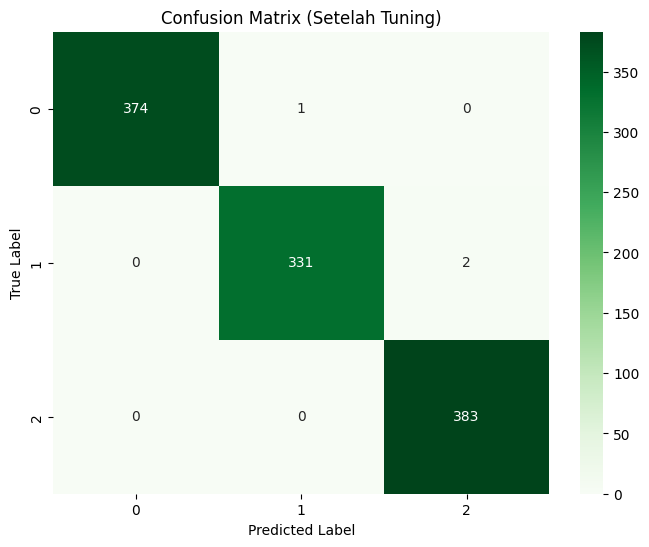

In [ ]:
# Melakukan prediksi dengan model terbaik (setelah tuning hyperparameter)
y_pred_tuned = best_model.predict(X_test)

# Menghitung akurasi model dengan prediksi yang telah dilakukan
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)

# Menghitung skor F1 menggunakan metode pembobotan 'weighted'
f1_tuned = f1_score(y_test, y_pred_tuned, average='weighted')

print("\nEvaluasi Model Klasifikasi (Setelah Tuning):")
print("Accuracy:", accuracy_tuned)
print("F1 Score:", f1_tuned)
print("\nClassification Report:\n", classification_report(y_test, y_pred_tuned))

# Membuat visualisasi matriks kebingungan setelah tuning
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_tuned), annot=True, fmt='d', cmap='Greens')

plt.title("Confusion Matrix (Setelah Tuning)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
Evaluasi Model Klasifikasi
- Sebelum Tuning
Accuracy: 0.9963336388634281
F1 Score: 0.9963335750411323

- Setelah tuning
Accuracy: 0.997250229147571
F1 Score: 0.9972499367285304

2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  jika precision atau recall rendah maka pertimbangkan untuk mengumpulkan data tambahan, coba algoritma lain atau lakukan feature engineering lebih lanjut, dan gunakan teknik resampling untuk mengatasi ketidakseimbangan kelas
  - kemungkinan besar model mengalami overfitting karena akurasi nya sebelum dan sesudah tuning sangat tinggi (hampir 100%)
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.
- Coba algoritma klasifikasi lain seperti SVM, Desicion Tree, atau KNN
- Lakukan tuning lebih lanjut pada hyperparameter
- lakukan feature engineering atau menambah data untuk meningkatkan performa model